# Probabilistic Programming and Bayesian Methods for Hackers

http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

## Chap 4: The greatest Theorem never told

### At a glance
At first, I thought there was a minor typo in the title (*theorems* instead of *theorem*). Yet it turned out the author only mentioned "the law of large numbers" on purpose.

This chapter consists of a little amount of maths. It aims at providing readers intuitions, rather than deep and solid understanding. I think it's okay to skip this chapter :).

### The Law of Large Numbers (LLN)
- The LLN says that
> Given enough trials, the average of a sequence of random variables from the same distribution covnerges to the expected value of that distribution.
- Mathematically expressed by:
$$\frac{1}{N} \sum\limits_{i=1}^{N} Z_i \to E[Z], \hspace{5pt} N \to \infty $$
- How quicky does it converge? 
  - By observing the *variance*: how quickly it decreases (to an acceptable small threshold).
- As stated in the name of the theorem, *a large number of trials* is required to have a reliable result that reflects the expected value. As a counterexample, a 5-star rating is not yet trustworthy if there are only a few reviews.


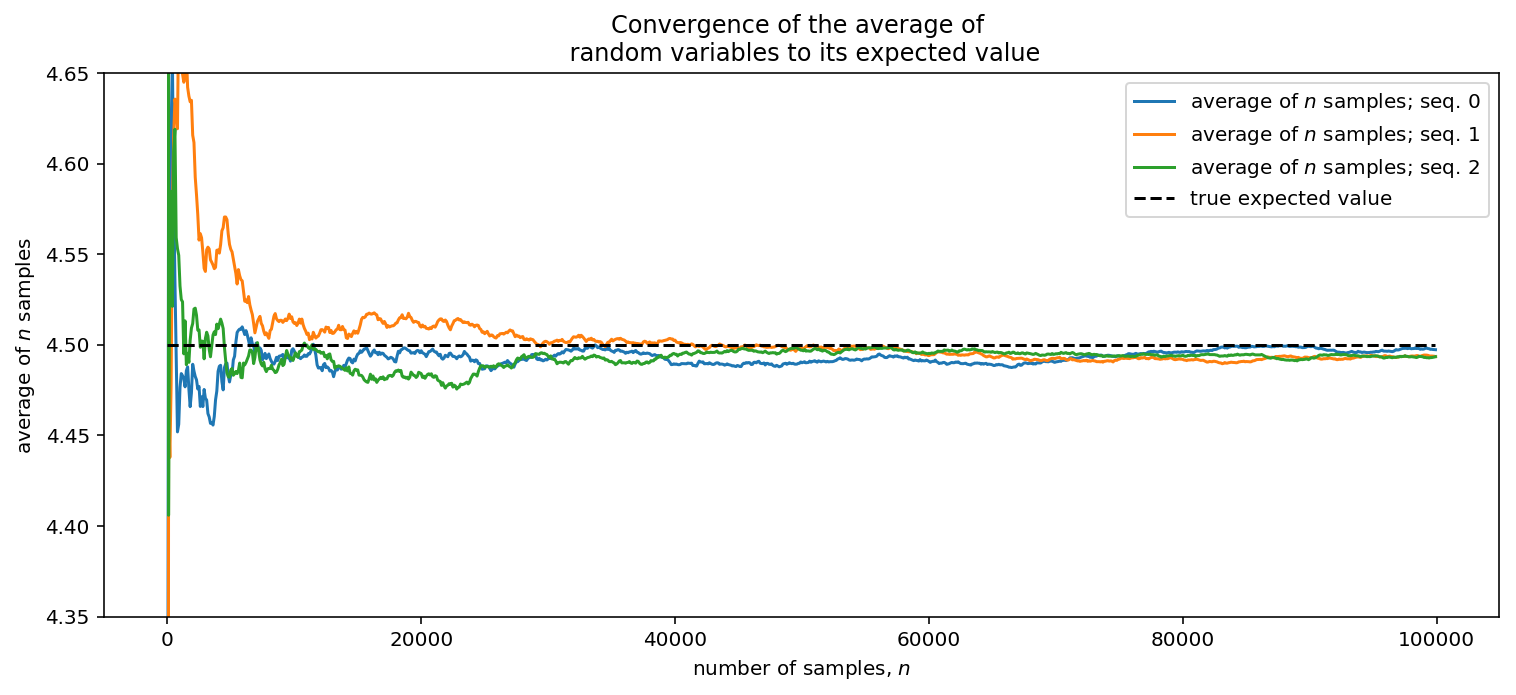

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12.5, 5)

sample_size = int(1e5)
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    
    plt.plot(N_samples, partial_average, lw=1.5, 
             label='average of $n$ samples; seq. %d' %k)

plt.plot(N_samples, expected_value * np.ones_like(partial_average), ls='--',
         label='true expected value', c='k')
plt.ylim(4.35, 4.65)
plt.title('Convergence of the average of \n random variables to its expected value')
plt.ylabel('average of $n$ samples')
plt.xlabel('number of samples, $n$')
plt.legend()
plt.show()

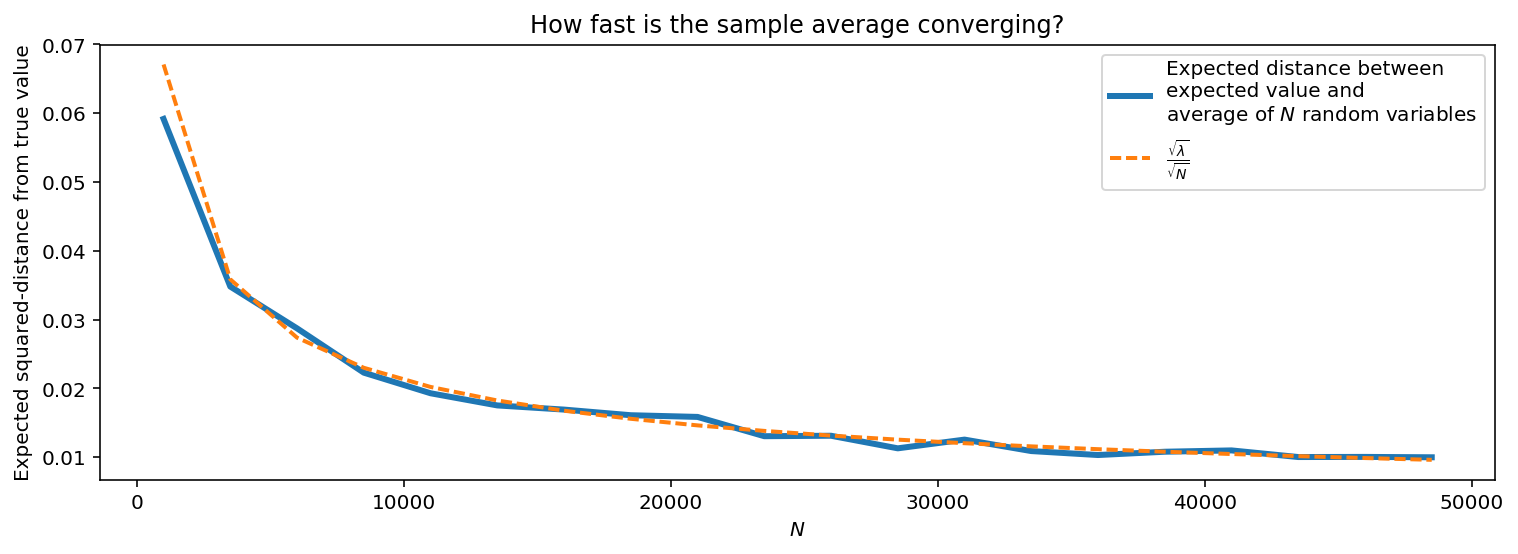

In [2]:
figsize(12.5, 4)

N_Y = 250
N_array = np.arange(1000, 50000, 2500)
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_

def D_N(n):
    Z = poi(lambda_, (n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value) ** 2).mean())

for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)
    
plt.xlabel('$N$')
plt.ylabel('Expected squared-distance from true value')
plt.plot(N_array, D_N_results, lw=3,
         label='Expected distance between \nexpected value and \naverage of $N$ random variables')
plt.plot(N_array, np.sqrt(expected_value)/np.sqrt(N_array), lw=2, ls='--',
         label=r'$\frac{\sqrt{\lambda}}{\sqrt{N}}$')
plt.legend()
plt.title('How fast is the sample average converging?')
plt.show()

In [4]:
# Example: Order Reddit submissions
import pymc3 as pm

votes = np.array([[32, 3], [1918, 101], [79, 17], [33, 6]])

def posterior_upvote_ratio(upvotes, downvotes, n_samples=20000):
    N = upvotes + downvotes
    
    with pm.Model() as model:
        upvote_ratio = pm.Uniform('upvote_ratio', 0, 1)
        observations = pm.Binomial('obs', N, upvote_ratio, observed=upvotes)    
       
        trace = pm.sample(n_samples, step=pm.Metropolis())
    burned_trace = trace[int(n_samples/4):]
    return burned_trace['upvote_ratio']

100%|██████████| 20500/20500 [00:02<00:00, 9082.81it/s]


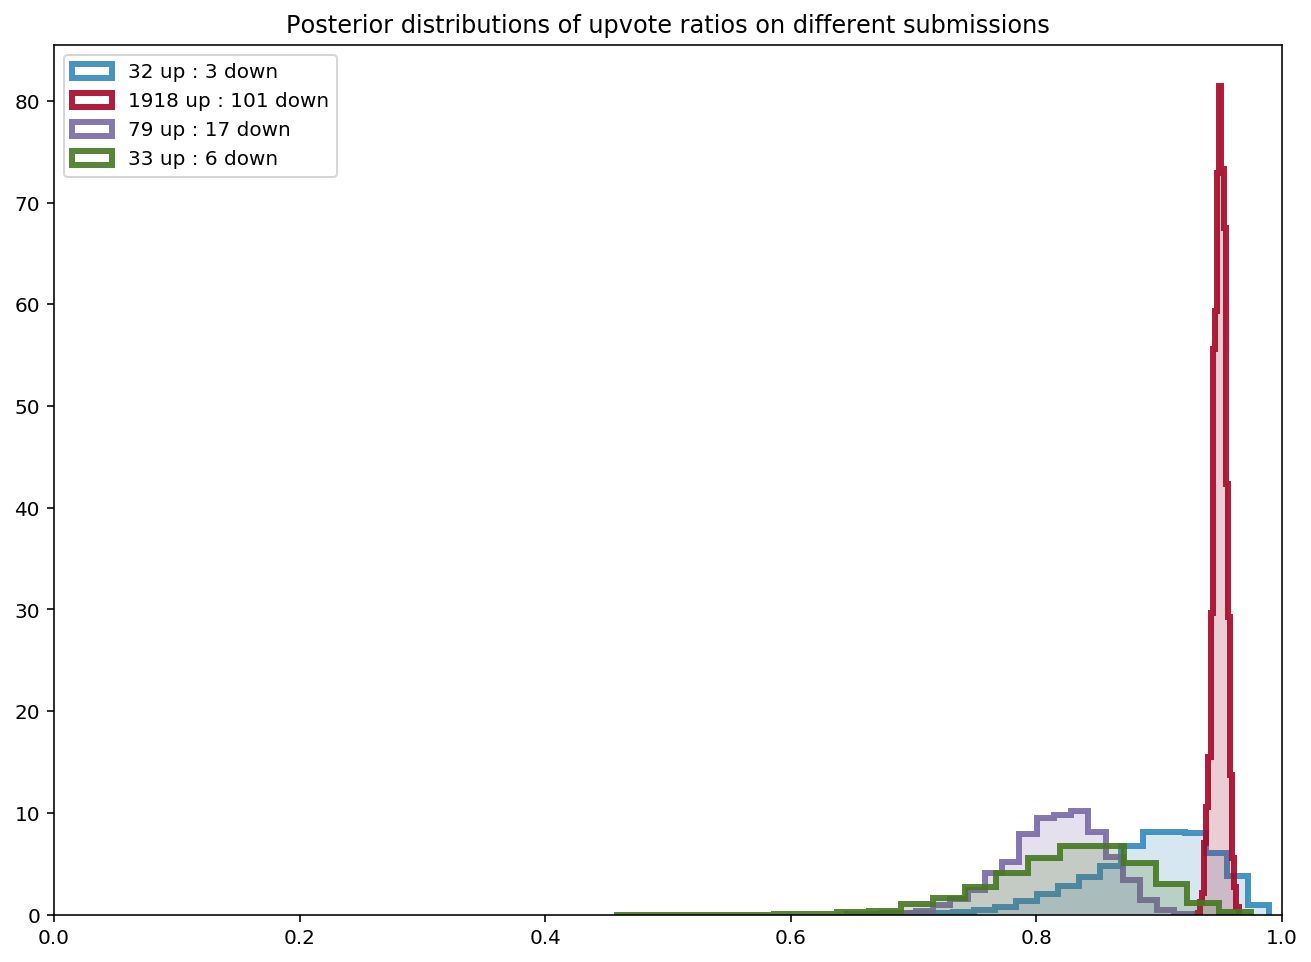

In [5]:
figsize(11, 8)
posteriors = []
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]

for i in range(votes.shape[0]):
    posteriors.append(posterior_upvote_ratio(votes[i, 0], votes[i, 1]))

    plt.hist(posteriors[i], bins=20, normed=True, alpha=0.9,
             histtype='step', color=colors[i], lw=3,
             label='%d up : %d down' % (votes[i, 0], votes[i, 1]))
    plt.hist(posteriors[i], bins=20, normed=True, alpha=0.2,
             histtype='stepfilled', color=colors[i], lw=3)

plt.legend(loc='upper left')
plt.xlim(0, 1)
plt.title('Posterior distributions of upvote ratios on different submissions')
plt.show()